# 信号时域分析  幅值包络分析

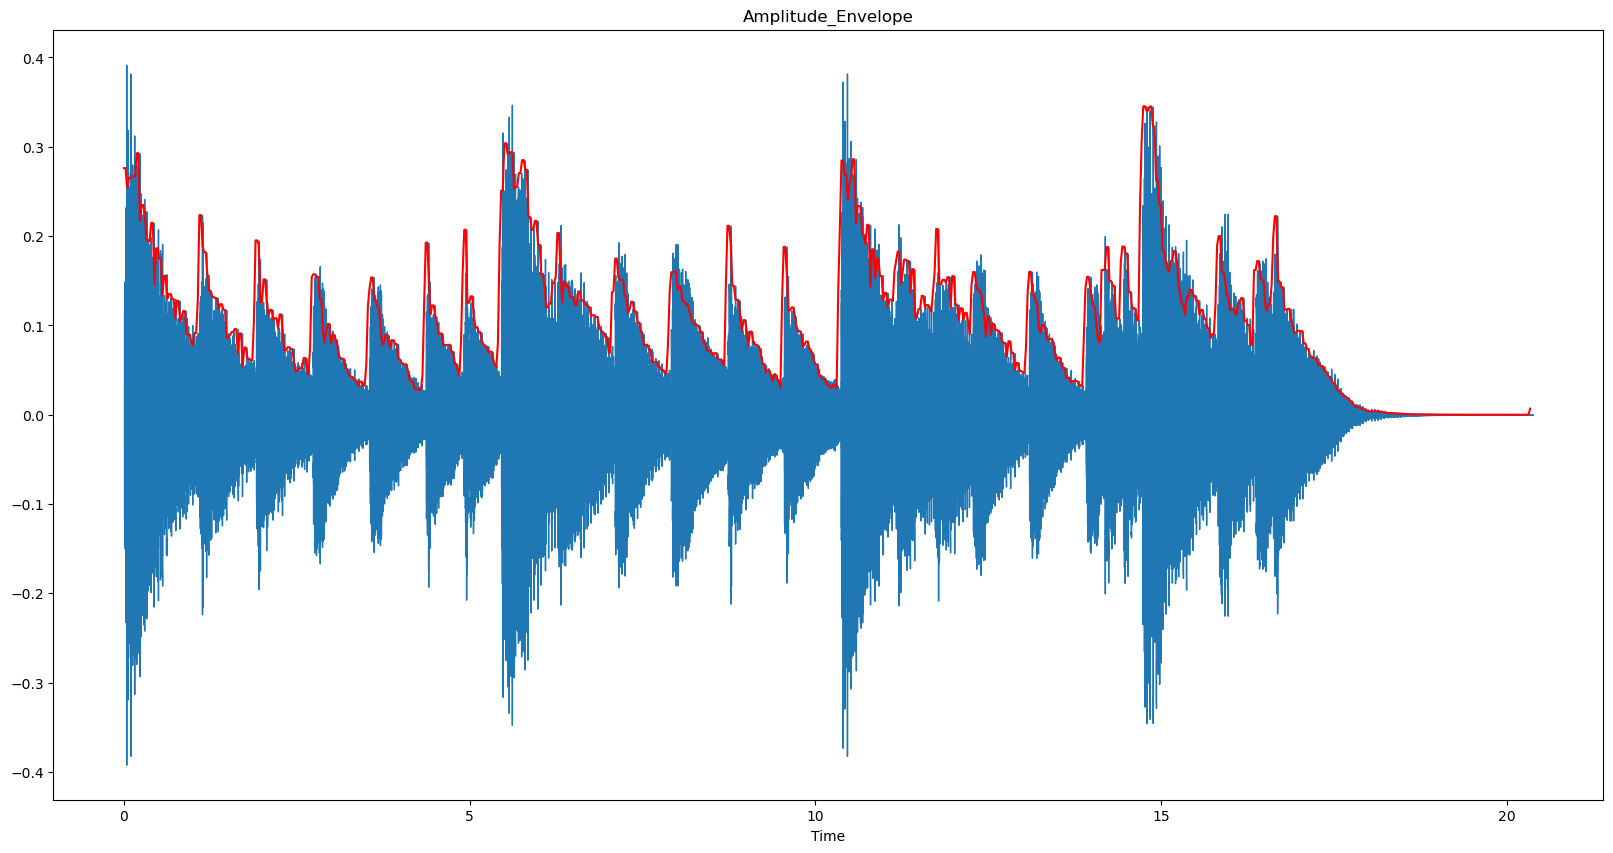

In [12]:
""" 提取信号的幅值包络
# 0.预设环境 下载语音库librosa 数组处理库nunpy
# 1. 加载信号 librosa.load()
# 2. 定义一个AE的函数，功能为取信号每一帧中幅值最值为该帧的包络
# 最值的获取方式：max(waveform[t*(frame_size-hop_size):t*frame_size])
# 3. 设置参数：每一帧长1024，以50%的重叠率分帧，调用该函数
# 4. 绘制信号的幅值包络信息
"""

# 0.预设环境 下载语音库librosa 数组处理库nunpy
import librosa
from librosa import display
import numpy as np
from matplotlib import pyplot as plt
# 1. 加载信号 librosa.load()
wave_path = "/Users/baijingyuan/Desktop/audio_data/music_piano.wav"
waveform, simple_rate = librosa.load(wave_path, sr = None)

# 2. 定义一个AE的函数，功能为取信号每一帧中幅值最值为该帧的包络
def Calc_Amplitude_Envelope(waveform, frame_length, hop_length):
    if len(waveform) % hop_length != 0:
        frame_num = int((len(waveform) - frame_length) / hop_length) + 1
        pad_num = frame_num * hop_length + frame_length - len(waveform)
        waveform = np.pad(waveform, (0, pad_num), mode = "wrap")
    frame_num = int((len(waveform) - frame_length) / hop_length) + 1
    waveform_ae = []
    for t in range(frame_num):
        current_frame = waveform[t*(frame_length - hop_length) : t*(frame_length - hop_length) + frame_length]
        current_ae = max(current_frame)
        waveform_ae.append(current_ae)
    return np.array(waveform_ae)
    
# 3. 设置参数：每一帧长1024，以50%的重叠率分帧，调用该函数
frame_size = 1024
hop_size = int(1024 * 0.5)
waveform_AE = Calc_Amplitude_Envelope(waveform, frame_length = frame_size, hop_length = hop_size)

# 4. 绘制信号的幅值包络信息
frame_scale = np.arange(0, len(waveform_AE))
time_scale = librosa.frames_to_time(frame_scale, hop_length = hop_size)
plt.figure(figsize = (20, 10))
librosa.display.waveshow(waveform)
plt.plot(time_scale, waveform_AE, color = "r")
plt.title("Amplitude_Envelope")
plt.show()

# 信号时域分析 均方根能量
![frame.png](frame.png)

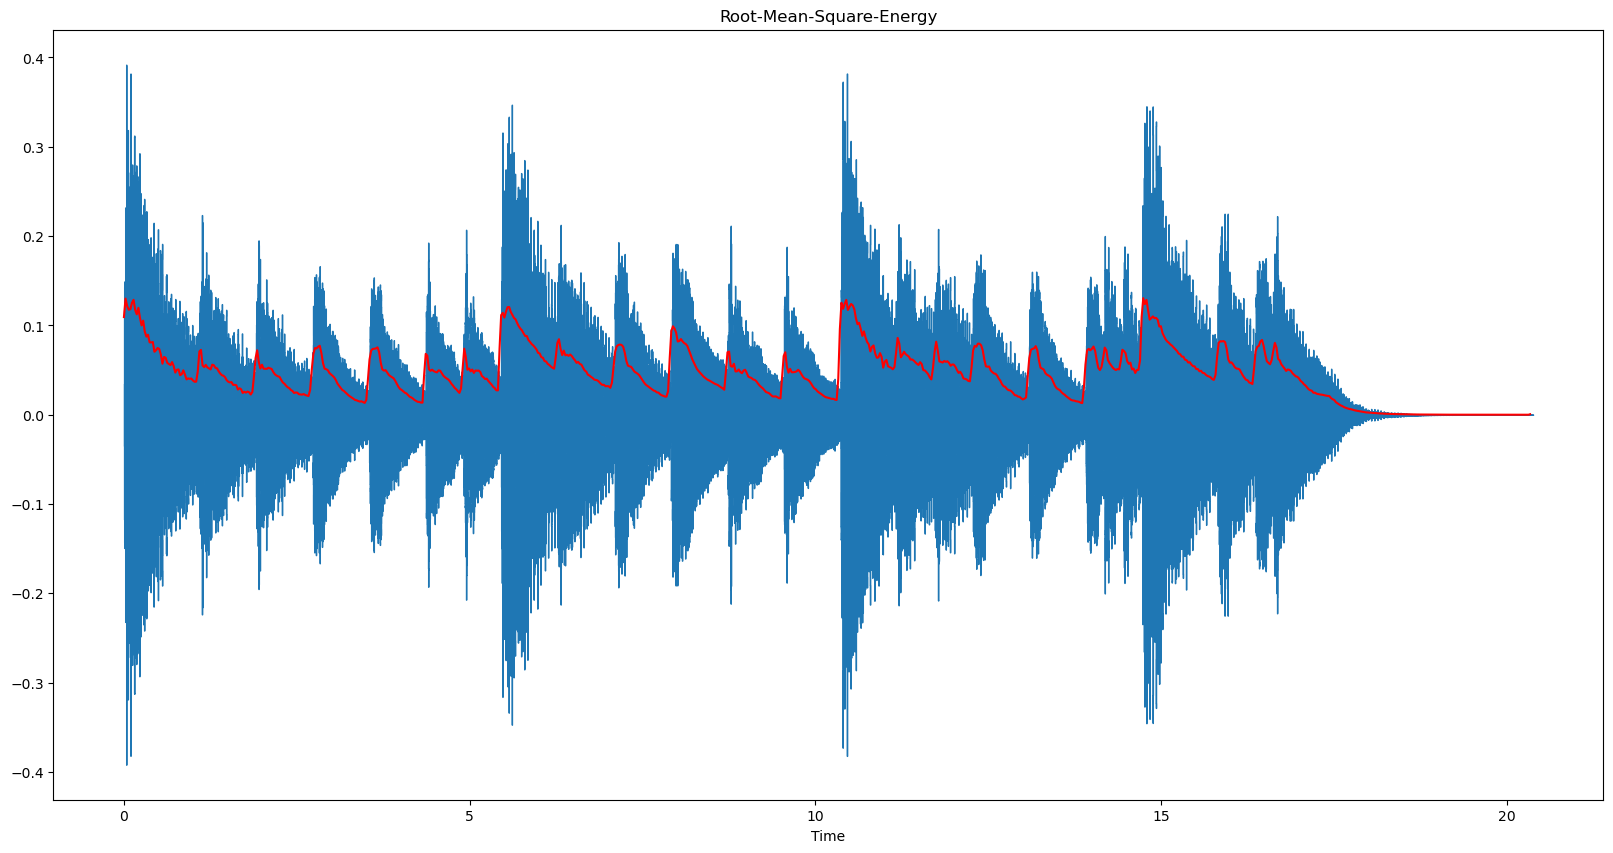

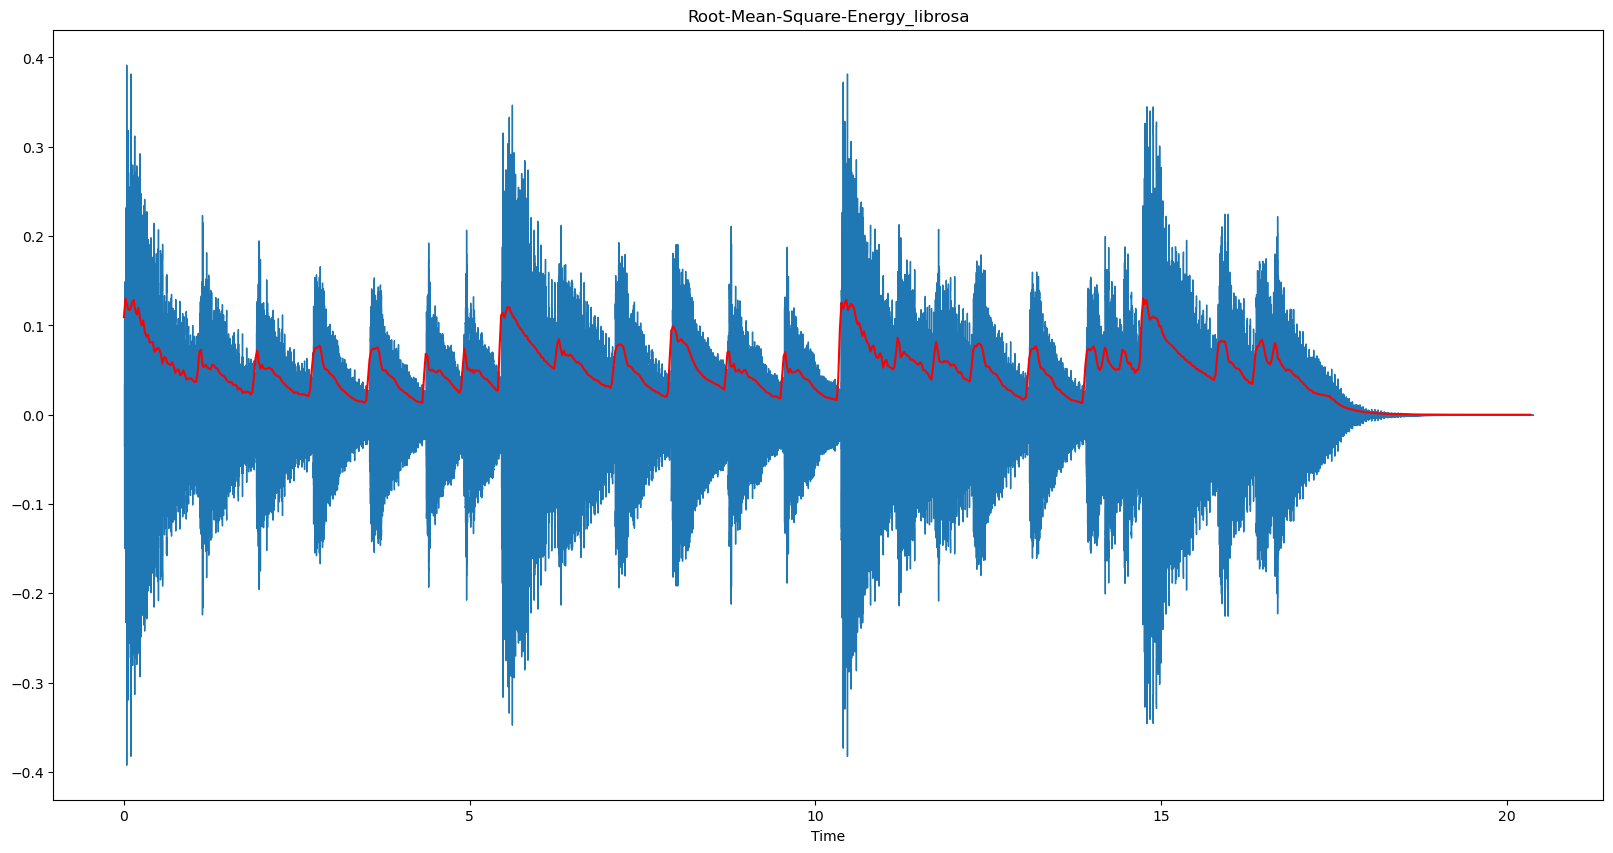

the bias is [ 5.49958491e-09 -9.98600591e-10 -1.15112625e-09  3.74437426e-11
 -1.83825655e-09  1.25656593e-09  1.50920765e-09  2.36412633e-09
 -4.95842284e-10  2.45860998e-10  3.78158727e-10 -2.36693680e-09
 -1.30469274e-10 -5.16977364e-10  1.26501745e-09  1.42848526e-09
 -2.61452429e-09  4.35570843e-09 -2.70021791e-09 -7.36073272e-10
 -4.43257653e-11  3.73385398e-09  2.29435262e-09 -3.57636470e-09
  1.60134422e-09  6.63819152e-10  1.66651069e-09 -8.82784505e-10
 -1.73561635e-09  4.16744514e-10  8.77076640e-10 -1.83669487e-09
  4.13679378e-09 -1.35121232e-09 -1.65632098e-09  1.44693757e-09
 -2.54201965e-10 -1.84939748e-09  2.68625427e-10 -3.50392548e-10
  4.97120838e-10  3.98916518e-10  7.12206398e-10  3.76296959e-10
  5.03132799e-10  5.43030135e-11  3.28827861e-10  3.17282572e-09
  5.90113416e-10 -1.31590762e-09  4.33509492e-10 -1.05342171e-09
  5.94575195e-10  1.31259017e-09  2.83454850e-10  1.81463907e-09
 -2.60755993e-10  1.51148082e-09  2.16048435e-09  1.31840198e-09
 -1.56355187e

In [30]:
"""信号的均方根值RootMeanSquareEnergy
# 0.预设环境
# 1.加载信号
# 2.定义函数RMS，功能：计算每一帧的均方根能量，
公式=该帧信号的平方和，取帧长的平均值后,开根号后
# 3.设置参数：每一帧长1024，以50%的重叠率分帧，调用该函数
# 4.绘制图像
# 5.利用librosa.feature.rms绘制信号的RMS
# 6.比较两者差异
"""

# 0.预设环境
import librosa
from librosa import display
from matplotlib import pyplot as plt
import numpy as np

# 1.加载信号
wave_path = "/Users/baijingyuan/Desktop/audio_data/music_piano.wav"
waveform, sr= librosa.load(wave_path, sr = None)

# 2.定义函数RMS，功能：计算每一帧的均方根能量，
def Calc_RMS(waveform, frame_length, hop_length):
    if len(waveform) % hop_length != 0:
        frame_num = int((len(waveform) - frame_length) / hop_length) + 1
        pad_num = frame_num * hop_length + frame_length - len(waveform)
        waveform = np.pad(waveform, pad_width = (0, pad_num), mode = "wrap")
    frame_num = int((len(waveform) - frame_length) / hop_length) + 1

    waveform_RMS = []
    for t in range(frame_num):
        current_frame = waveform[t * (frame_length - hop_length) : t * (frame_length - hop_length) + frame_length]
        current_RMS = np.sqrt(np.sum(current_frame ** 2) / frame_length)
        waveform_RMS.append(current_RMS)
    return np.array(waveform_RMS)

# 3.设置参数：每一帧长1024，以50%的重叠率分帧，调用该函数
frame_size = 1024
hop_size = int(1024 * 0.5)
waveform_RMS = Calc_RMS(waveform, frame_length = frame_size, hop_length = hop_size)

# 4.绘制图像
frame_scale = np.arange(0, len(waveform_RMS), step = 1)
time_scale = librosa.frames_to_time(frame_scale)
plt.figure(figsize = (20,10))
librosa.display.waveshow(waveform)
plt.plot(time_scale, waveform_RMS, color="r")
plt.title("Root-Mean-Square-Energy")
plt.show()

# 5.利用librosa.feature.rms绘制信号的RMS
waveform_RMS_librosa = librosa.feature.rms(y = waveform, frame_length = frame_size, hop_length = hop_size).T[1:,0]
plt.figure(figsize = (20,10))
librosa.display.waveshow(waveform)
plt.plot(time_scale, waveform_RMS_librosa, color = "r")
plt.title("Root-Mean-Square-Energy_librosa")
plt.show()

# 6.比较两者差异
bias = waveform_RMS_librosa - waveform_RMS
print(f"the bias is {bias}\n Congratulation!")